# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

/Users/nwchen24/anaconda/envs/Machine_learning_python2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/nwchen24/anaconda/envs/Machine_learning_python2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

In [4]:
#Define function to find the first ten instances of a digit
def find_first_10(lst, digit):
    return [i for i, x in enumerate(lst) if x<digit + .001 and x>digit - .001][:10]


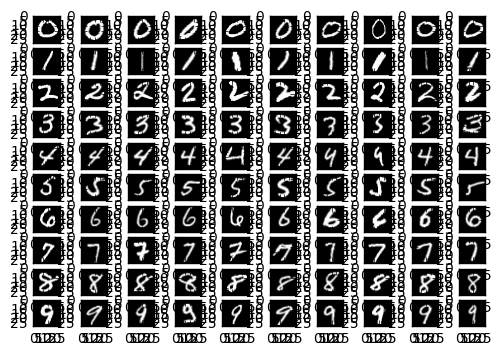

In [5]:
def P1(num_examples=10):

    ### STUDENT START ###
    #initialize the list that will contain the indices of the examples we want to plot
    example_digits = []
    
    #Populate this list with the first ten observations of each digit
    for i in range(num_examples):
        example_digits = example_digits + find_first_10(mini_train_labels, i)

        
    for example in range(len(example_digits)):
        plt.subplot(num_examples,num_examples, example + 1)
        matrix = mini_train_data[example_digits[example]].reshape((28,28))
        plt.set_cmap('gray')
        plt.imshow(matrix)

### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [7]:
def P2(k_values):

    ### STUDENT START ###
    for k in k_values:
        #define the classifier with k neighbors
        knn = KNeighborsClassifier(n_neighbors = k, p = 2)
        #fit the model on the mini training data
        knn.fit(mini_train_data, mini_train_labels)
        #test on the development set
        preds = knn.predict(dev_data)
        #get number correct
        correct = sum(preds == dev_labels)
        total = dev_data.shape[0]
        #report results on the development set
        print "KNN Accuracy Where k = " + str(k) + ": {:.3}".format(1.0 * correct / total)
        
    
    #detailed report for k = 1
    #define classifier  
    knn_k1 = KNeighborsClassifier(n_neighbors = 1, p = 2)
    #fit model
    knn_k1.fit(mini_train_data, mini_train_labels)
    #test on development set
    preds = knn_k1.predict(dev_data)
    print "Summary of KNN Performance Where K = 1"
    print classification_report(dev_labels, preds)


### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

KNN Accuracy Where k = 1: 0.888
KNN Accuracy Where k = 3: 0.878
KNN Accuracy Where k = 5: 0.869
KNN Accuracy Where k = 7: 0.865
KNN Accuracy Where k = 9: 0.863
Summary of KNN Performance Where K = 1
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000



ANSWER:

For k = 1, the most difficult digit to predict depends on the measure we use to define 'difficult'.  
- Based on precision, the most difficult digit to predict is 3.  
- Based on recall, the most difficult digit to predict is 2.  
- Based on F1, the most difficult digit to predict is 9.  

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [8]:
def P3(train_sizes, accuracies):

    ### STUDENT START ###

    #initialize the accuracy results list
    accuracy_results = accuracies

    for size in train_sizes:
        #get subset of training data
        train_data_subset, train_labels_subset = train_data[:size], train_labels[:size]

        #define classifier  
        knn_k1 = KNeighborsClassifier(n_neighbors = 1, p = 2)
        
        #get start time
        start_time = time.time()
        
        #fit model
        knn_k1.fit(train_data_subset, train_labels_subset)
        
        #test on development set
        #get predictions
        preds = knn_k1.predict(dev_data)
        
        #get end time
        end_time = time.time()
        
        #get accuracy metrics
        correct = sum(preds == dev_labels)
        total = dev_labels.shape[0]
        accuracy = correct / (1.0 * total)
        
        #get time
        prediction_time = end_time - start_time

        #append accuracy for this training size to accuracies list
        accuracy_results.append(accuracy)
        
        #print result
        print 'Training size: {} (accuracy: {:.3} prediction time: {:.3}s)'.format(size, 1.0 * correct / total, prediction_time)

    #return the accuracies list
    return accuracy_results

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)



Training size: 100 (accuracy: 0.72 prediction time: 0.0924s)
Training size: 200 (accuracy: 0.786 prediction time: 0.178s)
Training size: 400 (accuracy: 0.841 prediction time: 0.387s)
Training size: 800 (accuracy: 0.884 prediction time: 0.74s)
Training size: 1600 (accuracy: 0.902 prediction time: 1.49s)
Training size: 3200 (accuracy: 0.926 prediction time: 3.11s)
Training size: 6400 (accuracy: 0.937 prediction time: 6.25s)
Training size: 12800 (accuracy: 0.959 prediction time: 13.0s)
Training size: 25000 (accuracy: 0.97 prediction time: 28.5s)


[0.71999999999999997,
 0.78600000000000003,
 0.84099999999999997,
 0.88400000000000001,
 0.90200000000000002,
 0.92600000000000005,
 0.93700000000000006,
 0.95899999999999996,
 0.96999999999999997]

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [9]:
results = []
results = P3(train_sizes, results)


Training size: 100 (accuracy: 0.72 prediction time: 0.0914s)
Training size: 200 (accuracy: 0.786 prediction time: 0.184s)
Training size: 400 (accuracy: 0.841 prediction time: 0.375s)
Training size: 800 (accuracy: 0.884 prediction time: 0.794s)
Training size: 1600 (accuracy: 0.902 prediction time: 1.6s)
Training size: 3200 (accuracy: 0.926 prediction time: 3.31s)
Training size: 6400 (accuracy: 0.937 prediction time: 6.86s)
Training size: 12800 (accuracy: 0.959 prediction time: 14.7s)
Training size: 25000 (accuracy: 0.97 prediction time: 29.9s)


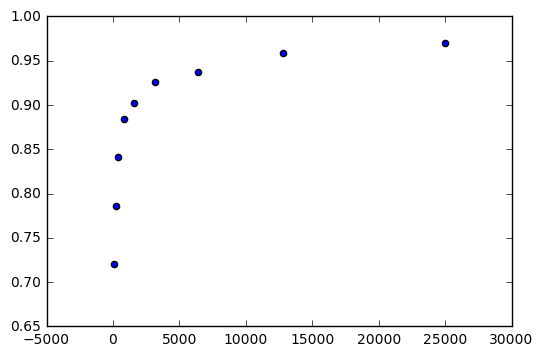

In [10]:
plt.scatter(train_sizes, results)

In [11]:
def P4():
    
    #get accuracy results for the list of training sizes
    #results = []
    #results = P3(train_sizes, results)

    ### STUDENT START ###
    #set up training sizes and accuracies as matrices
    results_for_lm = np.array(results).reshape(-1,1)
    train_sizes_for_lm = np.array(train_sizes).reshape(-1,1)

    #define the model
    regression_model = LinearRegression()

    #fit the model based on accuracy results and training sizes
    training_size_acc_fit = regression_model.fit(train_sizes_for_lm, results_for_lm)

    #set a variable equal to 60,000 so we can prdict accuracy when n = 60,000
    n_60k = np.array(60000)

    n_60k_pred_accuracy = training_size_acc_fit.predict(n_60k)
    print "With n = 60,000, the predicted accuracy of the KNN model is : " + str(round(n_60k_pred_accuracy[0][0],3))

    ### STUDENT END ###

P4()

With n = 60,000, the predicted accuracy of the KNN model is : 1.243


ANSWER:  

The problem with this model is that as the sample size grows, the model can predict an accuracy above 100% as it does for n = 60,000.  
One we could addresss this issue would be to add the inverse of sample size to the regression model that predicts accuracy from sample size.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

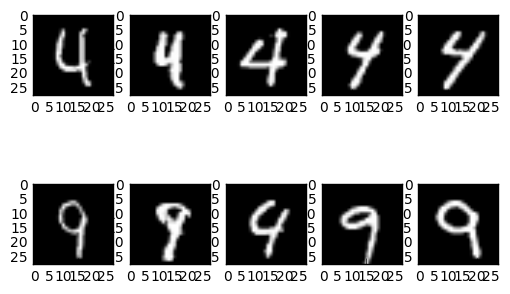

In [12]:
def P5():

### STUDENT START ###
#define classifier  
    knn_k1 = KNeighborsClassifier(n_neighbors = 1, p = 2)

    #fit the model
    knn_k1.fit(mini_train_data, mini_train_labels)

    #get predictions for development data
    preds = knn_k1.predict(dev_data)

    #produce confusion matrix
    confusion_matrix(dev_labels, preds)

    #nines and fours are the most frequently confused digits.
    #get a list of the indices when 4 was predicted but actual was 9 and vice versa.

    #put predictions and actual labels into dataframe
    pred_series = pd.Series(preds)
    dev_labels_series = pd.Series(dev_labels)

    pred_actual_df = pd.DataFrame()
    pred_actual_df['preds'] = pred_series
    pred_actual_df['dev_labels'] = dev_labels_series


    #define a function that can be applied to each row to flag examples where KNN misread a 4 or a 9.
    def flag_misread_9s(row):
        if row['preds'] != row['dev_labels'] and row['dev_labels'] == 9:
            return True
        else:
            return False

    def flag_misread_4s(row):
        if row['preds'] != row['dev_labels'] and row['dev_labels'] == 4:
            return True
        else:
            return False

    #Apply these functions row-wise to actually flag rows
    pred_actual_df['misread_4s'] = pred_actual_df.apply(flag_misread_4s, axis = 1)
    pred_actual_df['misread_9s'] = pred_actual_df.apply(flag_misread_9s, axis = 1)

    #Get the indices where 4s were misread
    missed_4_indices = pred_actual_df[pred_actual_df['misread_4s']].index.tolist()[:5]
    missed_9_indices = pred_actual_df[pred_actual_df['misread_9s']].index.tolist()[:5]

    #initialize the list that will contain the indices of the examples we want to plot
    example_digits = missed_4_indices + missed_9_indices

    #Plot examples 
    for example in range(len(example_digits)):
        plt.subplot(2, 5, example + 1)
        matrix = dev_data[example_digits[example]].reshape((28,28))
        plt.set_cmap('gray')
        plt.imshow(matrix)
    
### STUDENT END ###

P5()


(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [59]:
def P6():
    
### STUDENT START ###
    #Set s to use for sigma in the gaussian function
    s = 1
    
    #define gaussian function
    def gaussian_2d(x, y, sigma):
        weight = (1 / (2 * np.pi * (sigma**2))) * (np.e ** ((-1) * ((float(x) ** 2 + float(y) **2) / (2 * sigma **2))))
        return weight

    #create empty array to populate with weights
    gaussian_weights = np.zeros(shape=(3,3))

    #populate this array with values from the gaussian distribution
    for ix in range(3):
        for iy in range(3):
            gaussian_weights[ix, iy] = gaussian_2d(x = ix - 1, y = -(iy - 1), sigma = s)

    #define the function that takes a point and its closest neighbors as arguments and returns a gaussian weighted point
    def get_new_point(first_point_neighbors):
        #initialize new point value to zero
        new_point = 0
        for ix in range(3):
            for iy in range(3):
                new_point += first_point_neighbors[ix,iy] * gaussian_weights[ix,iy]
        return new_point
    
    def insert_zero_border(orig_point):
        
        orig_point_reshape = orig_point.reshape(28,28)
        
        #create zero row
        zero_row = np.zeros(shape = (1,28))
        #create zero column
        zero_column = np.zeros(shape = (30,1))

        #insert borders
        new_matrix = np.insert(orig_point_reshape, 0, zero_row, 0)
        new_matrix = np.append(new_matrix, zero_row, 0)
        new_matrix = np.insert(new_matrix, 0, 0, 1)
        new_matrix = np.append(new_matrix, zero_column, 1)

        return new_matrix

    def get_blurred_image(orig_point):
        
        #initialize blurred point matrix
        blurred_point = np.zeros(shape =(28,28))

        #add zero borders
        orig_matrix_w_borders = insert_zero_border(orig_point)

        for ix in range(1,29):
            for iy in range(1,29):

                #Get the original point and its neighbors
                point_and_neighbors = orig_matrix_w_borders[ix-1:ix+2, iy-1:iy+2]

                #get new point value
                new_point = get_new_point(point_and_neighbors)

                #populate the blurred point matrix with the weighted points
                blurred_point[ix-1,iy-1] = new_point

        return blurred_point.reshape(1,784)

    def preprocess_set(set_of_points):
        #initialize array to hold blurred points
        blurred_points = np.empty(shape = (1,784))

        #loop over each row in the set fed to the function and get the blurred point values
        for i in range(set_of_points.shape[0]):
            new_blurred_point = get_blurred_image(set_of_points[i])
            blurred_points = np.append(blurred_points, new_blurred_point, 0)

        return blurred_points[1:]

    #define classifier
    knn_k1 = KNeighborsClassifier(n_neighbors = 1, p = 2)

    def fit_and_test(train_data, train_labels, held_out_data, held_out_labels):

        #fit the model
        knn_k1.fit(train_data, train_labels)

        #get predictions for development data
        preds = knn_k1.predict(held_out_data)

        #compute accuracy
        correct = sum(preds == held_out_labels)
        total = held_out_labels.shape[0]
        accuracy = correct / (1.0 * total)

        return accuracy
    
    #Get blurred values for the mini training set and the development set
    mini_train_data_blurred = preprocess_set(mini_train_data)
    dev_data_blurred = preprocess_set(dev_data)

    #Measure accuracy with blurring combinations of the training / development data
    #Baseline accuracy without blurring
    acc_baseline = fit_and_test(mini_train_data, mini_train_labels, dev_data, dev_labels)
    print "Accuracy with no blurring: {:.3}".format(acc_baseline)

    #First, preprocess the training data, but not the development data
    acc_1 = fit_and_test(mini_train_data_blurred, mini_train_labels, dev_data, dev_labels)
    print "Accuracy with training data blurred and development data not blurred: {:.3}".format(acc_1)

    #Second, preprocess the development data, but not the training data
    acc_2 = fit_and_test(mini_train_data, mini_train_labels, dev_data_blurred, dev_labels)
    print "Accuracy with training data not blurred and development data blurred: {:.3}".format(acc_2)

    #Third, preprocess both the training and development data
    acc_3 = fit_and_test(mini_train_data_blurred, mini_train_labels, dev_data_blurred, dev_labels)
    print "Accuracy with both the training and development data blurred: {:.3}".format(acc_3)


### STUDENT END ###

P6()

Accuracy with no blurring: 0.888
Accuracy with training data blurred and development data not blurred: 0.897
Accuracy with training data not blurred and development data blurred: 0.795
Accuracy with both the training and development data blurred: 0.901


ANSWER:  

With sigma set to one for the gaussian function, compared to no blurring (accuracy = 0.888), there is a marginal improvement in accuracy  when (1) the training data is blurred and the development data is not blurred (accuracy = 0.897) and (2) when both the development and training data are blurred (accuracy = 0.901). More notably, accuracy suffers quite a significant decline compared to baseline when only the development data is blurred (accuracy = 0.795).

With sigma set to extreme values such as .1 or 15, accuracy suffers greatly compared to baseline when only one of the training or development sets is blurred. Interestingly, when both the training and development data are blurred, we still see an increase or no change in accuracy. Decreasing sigma to extreme values below 1 seems to make the scenario where the training data are blurred and the development data are not perform worse than when the training data are not blurred and the development data are blurred. Increasing sigma to an extreme value above 1, such as 15 seems to reverse this relationship.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [152]:
def P7():

### STUDENT START ###

    #*******************************#
    #Define the classifier for Bernoulli classifier
    bnb = BernoulliNB(alpha = .001, binarize = 0.2, fit_prior = False)

    #Fit model to the mini training data
    bnb_model = bnb.fit(mini_train_data, mini_train_labels)

    #Get predictions for the development data
    preds = bnb_model.predict(dev_data)

    #Get the accuracy
    correct = sum(preds == dev_labels)
    total = dev_labels.shape[0]
    accuracy = (1.0 * correct) / total
    print "Bernoulli NB Model Accuracy: {}".format(accuracy)


    #*******************************#
    #Convert mini training data and dev data to DF
    mini_train_data_df = pd.DataFrame(mini_train_data)
    dev_data_df = pd.DataFrame(dev_data)

    #Define breaks at which we will define white, gray, and black
    cuts = [0, .4, .8, 1]

    #discretize the mini training dataset
    mini_train_data_df_disc = mini_train_data_df[colname_list].apply(
        lambda col: pd.cut(col, bins=cuts, include_lowest=True, labels=False))

    #discretize the dev dataset
    dev_data_df_disc = dev_data_df[colname_list].apply(
        lambda col: pd.cut(col, bins=cuts, include_lowest=True, labels=False))

    #Define the classifier for Multinomial classifier
    mnb = MultinomialNB(alpha = 1, fit_prior = False)

    #Fit model to the mini training data
    mnb_model = bnb.fit(mini_train_data_df_disc, mini_train_labels)

    #Get predictions for the development data
    preds = mnb_model.predict(dev_data_df_disc)

    #Get the accuracy
    correct = sum(preds == dev_labels)
    total = dev_labels.shape[0]
    accuracy = (1.0 * correct) / total
    print "Multinomial NB Model Accuracy: {}".format(accuracy)
### STUDENT END ###

P7()

Bernoulli NB Model Accuracy: 0.827
Multinomial NB Model Accuracy: 0.824


ANSWER:  
The multinomial model does not seem to perform any better than the Bernoulli model. My intuition says that this is because there really are not many 'grays' in the images. Thus, transforming the features through binarizing and discretizing to three unique values have nearly the same effect. Effecting some unsystematic variation in hyperparameters such as alpha and the cut points supports this idea. I was not able to get the Multinomial NB model to perform as good as the best accuracy I was able to achieve with the Bernoulli model. In the code cell above, I have left the hyperparameters that returned the best accuracy in my testing of each model.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [154]:
?GridSearchCV

In [12]:
#def P8(alphas):

### STUDENT START ###



### STUDENT END ###

#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
#nb = P8(alphas)

In [14]:
#print nb.best_params_

ANSWER:

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [15]:
#def P9():

### STUDENT END ###


### STUDENT END ###

#gnb = P9()

ANSWER:

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

In [16]:
#def P10(num_examples):

### STUDENT START ###


### STUDENT END ###

#P10(20)

ANSWER:

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [17]:
#def P11(buckets, correct, total):
    
### STUDENT START ###


                
### STUDENT END ###

#buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

#P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

ANSWER:

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()